# Aircraft Selection Project

## Project Overview

As part of the company’s strategy to expand into new industries and diversify its portfolio, leadership has identified the aviation sector as a promising opportunity. The organization is exploring the acquisition and operation of aircraft for both commercial and private enterprises. However, there is limited internal expertise on the risks associated with various aircraft makes and models.

To support this strategic move, this project aims to analyze historical aircraft incident data to identify which aircraft types present the lowest operational risk. The goal is to provide data-driven recommendations that will inform purchasing decisions and guide the company’s entry into the aviation space.

## Objectives

1. Analyze injury data from aviation incidents involving various aircraft makes and models.

2. Develop a risk scoring system based on severity and frequency of injuries.

3. Visualize and summarize the safest and riskiest aircraft models.

4. Provide actionable insights and procurement recommendations to leadership.

## Importing Libaries

In [1]:
# Let's import the necessary libraries for our project

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation and Cleaning

In [2]:
# We load the data from our csv file for further manipulation
# Our data is encoded in Windows-1252
df = pd.read_csv('AviationData.csv', encoding = 'Windows-1252')

C:\Users\USER\AppData\Local\Temp\ipykernel_6596\3918863186.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding = 'Windows-1252')


In [3]:
# Let's inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Let us see what each column name is
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
# We have columns 'Make' and 'Model'
#These would serve as a good index when combined to give us specific aircrafts
df[['Make', 'Model']].head()

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501


In [6]:
# For each flight, there are a number injuries with various degrees of severity
df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,2.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0
2,3.0,NaN,NaN,NaN
3,2.0,0.0,0.0,0.0
4,1.0,2.0,NaN,0.0


In [7]:
# Let's create a new datafrae with the relevant columns
columns = ['Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured' ]
df_2 = df.loc[:, columns]
df_2.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Stinson,108-3,2.0,0.0,0.0,0.0
1,Piper,PA24-180,4.0,0.0,0.0,0.0
2,Cessna,172M,3.0,NaN,NaN,NaN
3,Rockwell,112,2.0,0.0,0.0,0.0
4,Cessna,501,1.0,2.0,NaN,0.0


In [8]:
# Let's inspect these specific columns
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    88826 non-null  object 
 1   Model                   88797 non-null  object 
 2   Total.Fatal.Injuries    77488 non-null  float64
 3   Total.Serious.Injuries  76379 non-null  float64
 4   Total.Minor.Injuries    76956 non-null  float64
 5   Total.Uninjured         82977 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [9]:
# We have several null values, let's see how much dropping them will affect our dataset
df_2.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 74270 entries, 0 to 88888
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    74270 non-null  object 
 1   Model                   74270 non-null  object 
 2   Total.Fatal.Injuries    74270 non-null  float64
 3   Total.Serious.Injuries  74270 non-null  float64
 4   Total.Minor.Injuries    74270 non-null  float64
 5   Total.Uninjured         74270 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.0+ MB


In [10]:
# Not bad. We can now drop them permanently
df_2.dropna(inplace = True)

## Risk Assesment

The risk involved with an aircraft is tied to the number and severity of injuries for that aircraft.
Also, there is a risk involved with aircrafts that have not been used frequently. But since we can't access all the flight logs, we will use the injuries as our risk factor. We will factor in the amount of data available for each aircraft as well.

In [11]:
# Let us create a new column that will tell us how risky the aircraft is considering the number and severity of injuries
df_2['Risk.Score'] = (df_2['Total.Fatal.Injuries'] * 500 +
                      df_2['Total.Serious.Injuries'] * 300 +
                      df_2['Total.Minor.Injuries'] * 100)

In [12]:
#Let's make a count for the number of events associated with each aircraft
event_counts = df_2.groupby(['Make', 'Model']).size().reset_index(name='Event.Count')
event_counts

,Make,Model,Event.Count
0,177MF LLC,PITTS MODEL 12,1
1,1st Ftr Gp,FOCKE-WULF 190,1
2,2007 Savage Air LLC,EPIC LT,1
3,2021FX3 LLC,CCX-2000,2
4,3XTRIM,450 ULTRA,1
...,...,...,...
16976,de Havilland,DHC-3,1
16977,de Havilland,DHC-6-200,1
16978,de Havilland,DHC-8-202,1
16979,drone,Viper Pro,1


In [13]:
# Let's merge the event_counts and the rest of our Data
df_3 = df_2.merge(event_counts, on=['Make', 'Model'])

In [14]:
# Let's see the distribution of event counts
df_3["Event.Count"].unique()

array([  66,    4,    5,  408,  278,    6,    1,  410,   97,   91,   61,
         21,   11,   37, 1107, 1923,  356,  119,   80,   38,   31,   45,
         93,  122,  403,  117,  152,  247,  151,  159,   48,   17,  253,
         62,  165,    3,  116,   20,  146,   41,  533,  672,   52,  787,
        110,   22,  127,  239,    9,   15,   55,   39,   23,    8,   63,
         68,   28,  190,  144,  476,  232,    7,   26,    2,  657,  240,
        324,  129,  392,   58,  118,  114,  171,   47,  192,  401,   18,
        128,  132,  321,  266,   67,  157,  206,  245,  140,  170,   14,
        173,   51,  478,   84,  183,   49,  181,   10,   43,  120,  113,
         89,   76,  381,   65,   56,   64,   24,   40,   73,  208,   29,
        141,   69,  172,  434,  124,   82,   27,   54,  214,   46,   30,
         95,  196,   12,   36,   99,   85,   16,   74,  131,   53,  104,
         86,   13,   81,   35,  103,   44,   96,   72,  339,  148,   19,
         34,  108,  189,   42,   57,   33,  191,  1

In [15]:
# Now we can flag the aircrafts based on its volume of samples

def flag_low_data(count):
    if count == 1:
        return 'Only 1 event'
    elif count <= 5:
        return '5 or less events'
    elif count <= 10:
        return "10 or less events"
    else:
        return "Sufficient Data"

df_3['Flag'] = df_3['Event.Count'].apply(flag_low_data)

In [16]:
# Let's see our new Dataframe with the added columns
df_3.head() 

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Risk.Score,Event.Count,Flag
0,Stinson,108-3,2.0,0.0,0.0,0.0,1000.0,66,Sufficient Data
1,Piper,PA24-180,4.0,0.0,0.0,0.0,2000.0,4,5 or less events
2,Rockwell,112,2.0,0.0,0.0,0.0,1000.0,5,5 or less events
3,Cessna,180,4.0,0.0,0.0,0.0,2000.0,408,Sufficient Data
4,Cessna,140,0.0,0.0,0.0,2.0,0.0,278,Sufficient Data


In [17]:
# Let's combine 'Make' and 'Model' into one identifier

df_3['Identifier'] = df_3['Make'] + '-' + df_3['Model']
df_3['Identifier'].head()

0     Stinson-108-3
1    Piper-PA24-180
2      Rockwell-112
3        Cessna-180
4        Cessna-140
Name: Identifier, dtype: object

## Preparing Data for Visualisation

Now we'll create a final dataframe to create our visualisations

In [18]:
# Creating an aggregated DataFrame

df_4 = df_3.groupby('Identifier').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Risk.Score': 'sum',
    'Event.Count': 'first',
    'Flag': 'first'
}).reset_index()

df_4.head()

,Identifier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Risk.Score,Event.Count,Flag
0,177MF LLC-PITTS MODEL 12,0.0,2.0,0.0,0.0,600.0,1,Only 1 event
1,1st Ftr Gp-FOCKE-WULF 190,1.0,0.0,0.0,0.0,500.0,1,Only 1 event
2,2007 Savage Air LLC-EPIC LT,0.0,0.0,0.0,4.0,0.0,1,Only 1 event
3,2021FX3 LLC-CCX-2000,0.0,0.0,0.0,4.0,0.0,2,5 or less events
4,3XTRIM-450 ULTRA,1.0,0.0,1.0,0.0,600.0,1,Only 1 event


In [19]:
# Let's check how many of our aircrafts only have one registered event
df_4[df_4['Flag'] == 'Only 1 event'].shape

(12591, 8)

In [20]:
# The number is quite large so we can drop this category
df_4 = df_4[df_4['Flag'] != 'Only 1 event']

In [21]:
# Let's sort them by 'Risk.Score' values
df_4 = df_4.sort_values(by='Risk.Score', ascending=True).reset_index(drop = True)
df_4.head(10)

,Identifier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Risk.Score,Event.Count,Flag
0,2021FX3 LLC-CCX-2000,0.0,0.0,0.0,4.0,0.0,2,5 or less events
1,Cessna-C-180J,0.0,0.0,0.0,3.0,0.0,2,5 or less events
2,Cessna-C-182J,0.0,0.0,0.0,8.0,0.0,2,5 or less events
3,Cessna-C-182P,0.0,0.0,0.0,5.0,0.0,2,5 or less events
4,Cessna-C-402,0.0,0.0,0.0,6.0,0.0,2,5 or less events
5,Cessna-C152,0.0,0.0,0.0,4.0,0.0,3,5 or less events
6,Cessna-C172M,0.0,0.0,0.0,5.0,0.0,4,5 or less events
7,Cessna-C177B,0.0,0.0,0.0,2.0,0.0,2,5 or less events
8,Cessna-C182,0.0,0.0,0.0,5.0,0.0,2,5 or less events
9,Cessna-CE-152,0.0,0.0,0.0,2.0,0.0,2,5 or less events


Our Dataset is now ready for exportation. We can do some visualisations using matplotlib before exporting to tableau

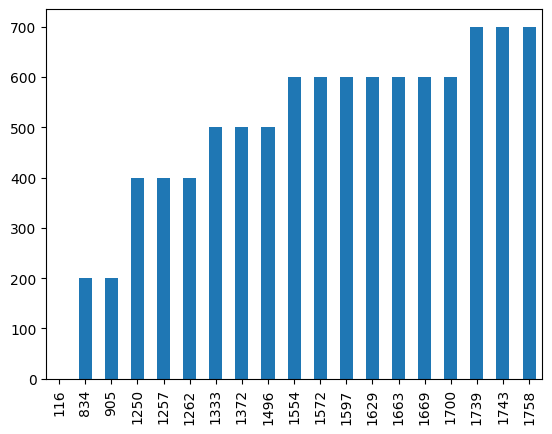

In [22]:
# Let's see the 20 safest aircrafts with sufficient data
df_4[df_4['Flag'] == 'Sufficient Data']['Risk.Score'].iloc[0: 19].plot.bar()
plt.show()

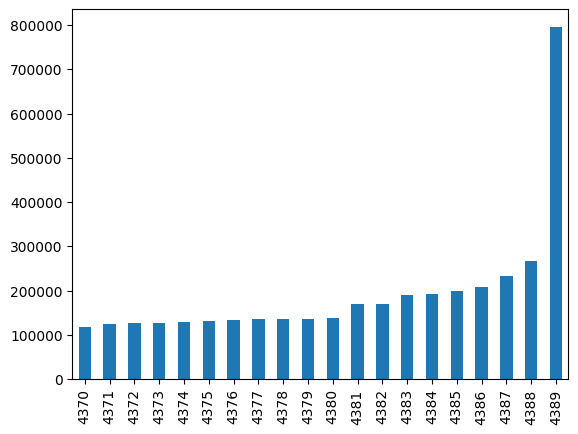

In [23]:
# Let's see the 20 least safe aircrafts
df_4['Risk.Score'].tail(20).plot.bar()
plt.show()

In [24]:
# We can now export our dataframe to a csv file

df_4.to_csv("aircraft_risk_2.csv", index=False)

In [25]:
df_4[df_4['Flag'] == 'Sufficient Data']['Risk.Score'].head(20)

116       0.0
834     200.0
905     200.0
1250    400.0
1257    400.0
1262    400.0
1333    500.0
1372    500.0
1496    500.0
1554    600.0
1572    600.0
1597    600.0
1629    600.0
1663    600.0
1669    600.0
1700    600.0
1739    700.0
1743    700.0
1758    700.0
1769    700.0
Name: Risk.Score, dtype: float64